<h1><center></center></h1>
<h1><center>Internship on DSA-Project 2</center></h1>
<h1><center>Customer Segmentation for Marketing Strategy</center></h1>

# Week 1 - Project Kick-off and Data Collection

### Objectives
* Data Collection
* Missing Data Imputation
* Outlier Detection
* Basic Data Transformation
* Exploratory Data Analysis

## 1.1 Import Dependencies and Data Collection

### 1.1.1 Importing necessary libraries

In [1]:
# importing libraries necessary for EDA and data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

### 1.1.2 Importing Data

In [2]:
# loading the Training dataset and saving it as cust_seg_data
cust_seg_data = pd.read_csv('/content/Train.csv')

In [3]:
#copying and saving the dataset as data inorder to retain the original dataset
data = cust_seg_data.copy()
data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


### 1.1.3 Understanding the DataFrame

In [4]:
# displays the size of the dataset
data.shape

(21811, 18)

The Dataframe contains **31647 rows** and **18 columns**

In [5]:
# gives an idea about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21811 entries, 0 to 21810
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                21811 non-null  object 
 1   customer_age                      21377 non-null  float64
 2   job_type                          21811 non-null  object 
 3   marital                           21712 non-null  object 
 4   education                         21811 non-null  object 
 5   default                           21811 non-null  object 
 6   balance                           21542 non-null  float64
 7   housing_loan                      21811 non-null  object 
 8   personal_loan                     21700 non-null  object 
 9   communication_type                21811 non-null  object 
 10  day_of_month                      21811 non-null  int64  
 11  month                             21811 non-null  object 
 12  last

In [6]:
# gives the count of different datatypes variables in the dataset
data.dtypes.value_counts()

object     10
float64     5
int64       3
Name: count, dtype: int64

In [7]:
# counts the number of null values
data.isna().sum()

id                                      0
customer_age                          434
job_type                                0
marital                                99
education                               0
default                                 0
balance                               269
housing_loan                            0
personal_loan                         111
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 227
num_contacts_in_campaign               73
days_since_prev_campaign_contact    17794
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

#### From the above metrics we can conclude that:
* There are **7** Features or columns having null values, columns consists of **5 numericals columns** and **2 Catergorical columns**
* The Feature **"days_since_prev_campaign_contact"** is having **25831 rows** of null values which is **81.6%** of total rows and this feature **must be Removed**.
* The other 6 Features can be imputed using various techniques.

In [8]:
# displays the count of duplicates
data.duplicated().sum()

0

In [9]:
# gives the count of unique values in the variables
data.nunique()

id                                  21811
customer_age                           75
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              5554
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1335
num_contacts_in_campaign               45
days_since_prev_campaign_contact      471
num_contacts_prev_campaign             38
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

#### From the above metrics conclusion is made:
* **id** columns contains unique values and should be removed.


### 1.1.4 Removing Columns

In [10]:
data.drop(['id','days_since_prev_campaign_contact'], axis=1, inplace=True)

In [11]:
data.shape

(21811, 16)

## 1.2 Data Preprocessing - Missing value imputation

### 1.2.1 Analysing distributions of Feature with null values .

In [12]:
# Extracting columns having null values
col = data.columns
imp_list=[]
for i in col:
  if data[i].isna().sum() > 0:
    imp_list.append(i)

imp_list

['customer_age',
 'marital',
 'balance',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign']

In [13]:
# classifying null value columns into numerical and categorical
num_imp_list = data[imp_list].select_dtypes(include='number').columns
cat_imp_list = data[imp_list].select_dtypes(include='object').columns
num_imp_list, cat_imp_list

(Index(['customer_age', 'balance', 'last_contact_duration',
        'num_contacts_in_campaign'],
       dtype='object'),
 Index(['marital', 'personal_loan'], dtype='object'))

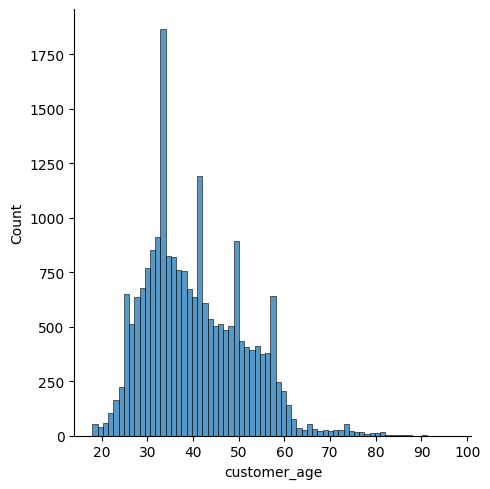

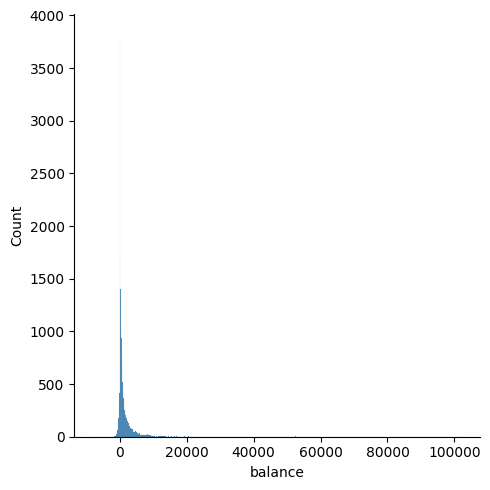

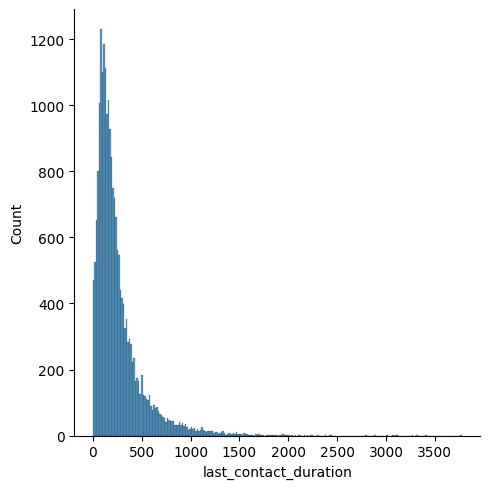

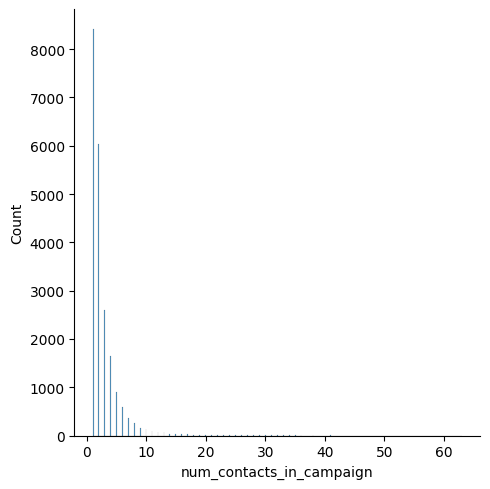

In [14]:
# analysing the numerical distribution
for i in num_imp_list:
  sns.displot(data[i])
  plt.show()

In [15]:
# Also checking the skew
for i in num_imp_list:
  sk=round(data[i].skew(),3)
  print(f'Skewness of {i} :::: {sk}')

Skewness of customer_age :::: 0.673
Skewness of balance :::: 9.256
Skewness of last_contact_duration :::: 3.078
Skewness of num_contacts_in_campaign :::: 5.06


#### Conclusion
* From the above Distribution plots and skewness measure we can conclude the numerical features containing null value are **Right Skewed** and need to be imputed using **Median value** in each Feature.
* The Categorical null values must be imputed using **Mode**.

### 1.2.2 Impution missing values.

In [16]:
# Numerical columns
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
# catergorical columns
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data1 = data.copy()

data1[num_imp_list] = imp_median.fit_transform(data1[num_imp_list])
data1[cat_imp_list] = imp_mode.fit_transform(data1[cat_imp_list])

In [17]:
data1.isna().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

## 1.3 Data Preprocessing - Outlier Detection

### 1.3.1 Percentage wise distribution of outliers in each feature.

In [18]:
numerical_columns = data1.select_dtypes(include=['number']).columns.tolist()

outlier_info = {}

for col in numerical_columns:
    Q1 = data1[col].quantile(0.25)
    Q3 = data1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data1[col] < lower_bound) | (data1[col] > upper_bound)]

    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(data1)) * 100

    outlier_info[col] = {'Number of Outliers': len(outliers),'Percentage of Outliers': outlier_percentage}

outlier_df = pd.DataFrame.from_dict(outlier_info).transpose()
outlier_df

,Number of Outliers,Percentage of Outliers
customer_age,187.0,0.857366
balance,2352.0,10.783550
day_of_month,0.0,0.000000
last_contact_duration,1587.0,7.276145
num_contacts_in_campaign,1528.0,7.005639
num_contacts_prev_campaign,4017.0,18.417312
term_deposit_subscribed,2367.0,10.852322


### 1.3.2 Function for Analysing Outliers in continuous Features

In [19]:
df = data.copy()

class DataFrameOutlierDetector:
  def __init__(self, df):
    self.df = df

  def detect_outliers(self, column_name):

    Q1 = self.df[column_name].quantile(0.25)
    Q3 = self.df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = self.df[(self.df[column_name] < lower_bound) | (self.df[column_name] > upper_bound)]

    outlier_df=pd.DataFrame(outliers)
    return outlier_df

  def outlier_describe(self, column_name):

    original_stats = self.df[column_name].describe()
    outlier = self.detect_outliers(column_name)
    non_outliers = self.df[~self.df.index.isin(outlier.index)]
    non_outlier_stats = non_outliers[column_name].describe()

    return pd.DataFrame({
        'with_outliers': original_stats,
        'without_outliers': non_outlier_stats
    })

  def plot_box(self, column_name):

    plt.figure(figsize=(6, 4))
    self.df.boxplot(column=column_name)
    plt.title(f'Box plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()

detector = DataFrameOutlierDetector(df)

#### 1. Customer Age

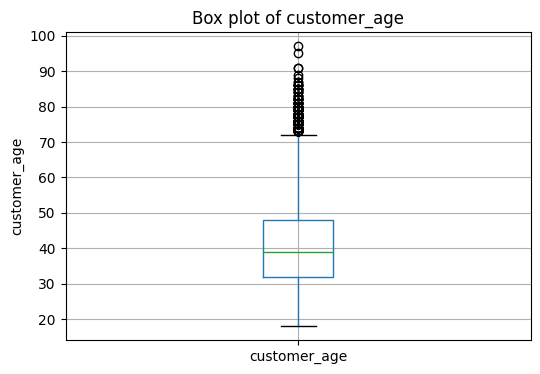

In [20]:
detector.plot_box('customer_age')

In [21]:
detector.detect_outliers('customer_age')

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
261,78.0,retired,married,secondary,no,8303.0,no,no,telephone,9,jun,730.0,1.0,12,failure,1
302,76.0,retired,married,secondary,no,2656.0,no,no,cellular,10,nov,261.0,5.0,0,unknown,1
521,73.0,retired,married,primary,no,-5.0,no,no,cellular,28,jun,344.0,6.0,6,failure,0
620,88.0,retired,married,primary,no,5235.0,no,no,telephone,1,apr,568.0,2.0,0,unknown,1
638,73.0,retired,divorced,primary,no,803.0,no,no,cellular,9,sep,460.0,5.0,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21598,76.0,retired,married,primary,no,2974.0,no,no,cellular,12,aug,648.0,1.0,0,unknown,1
21600,77.0,retired,married,secondary,no,820.0,no,no,telephone,23,apr,263.0,4.0,0,unknown,1
21651,75.0,retired,married,tertiary,no,7801.0,no,no,telephone,1,feb,494.0,2.0,0,unknown,1
21790,81.0,retired,married,secondary,no,667.0,no,no,telephone,8,jul,255.0,1.0,1,success,1


In [22]:
detector.outlier_describe('customer_age')

,with_outliers,without_outliers
count,21377.000000,21190.000000
mean,40.438602,40.109108
std,10.777519,10.226926
min,18.000000,18.000000
25%,32.000000,32.000000
50%,39.000000,38.000000
75%,48.000000,48.000000
max,97.000000,72.000000


#### 2. Balance

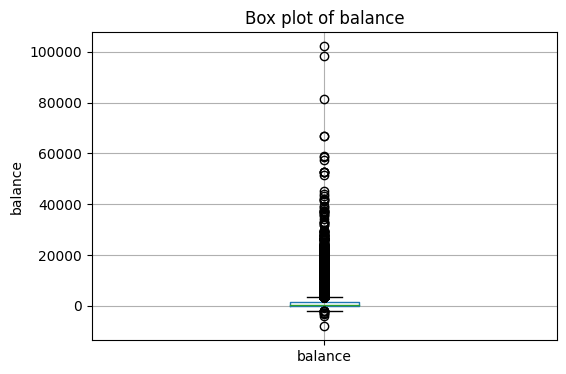

In [ ]:
detector.plot_box('balance')

In [ ]:
detector.detect_outliers('balance')

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
11,35.0,technician,single,secondary,no,5212.0,yes,no,cellular,7,may,303.0,2.0,0,unknown,0
13,50.0,management,married,secondary,no,4873.0,no,no,telephone,6,feb,381.0,6.0,9,failure,0
28,45.0,admin.,single,secondary,no,10390.0,yes,no,cellular,20,nov,101.0,1.0,0,unknown,0
47,32.0,management,married,secondary,no,4136.0,yes,no,cellular,12,may,94.0,4.0,0,unknown,0
59,47.0,management,married,tertiary,no,4113.0,no,no,cellular,18,aug,128.0,13.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31607,37.0,management,married,tertiary,no,12857.0,yes,no,unknown,30,may,419.0,1.0,0,unknown,0
31609,43.0,self-employed,married,tertiary,no,5996.0,yes,no,cellular,18,nov,281.0,1.0,0,unknown,0
31616,54.0,technician,divorced,primary,no,7292.0,yes,no,unknown,30,may,160.0,1.0,0,unknown,0
31617,51.0,blue-collar,married,tertiary,no,5418.0,yes,no,cellular,21,nov,59.0,3.0,0,unknown,0


In [ ]:
detector.outlier_describe('balance')

,with_outliers,without_outliers
count,31248.000000,27939.000000
mean,1368.112615,634.692795
std,3085.342417,836.403736
min,-8020.000000,-1938.000000
25%,72.000000,44.000000
50%,449.000000,348.000000
75%,1413.000000,972.000000
max,102128.000000,3424.000000


#### 3. Last Contact Duration

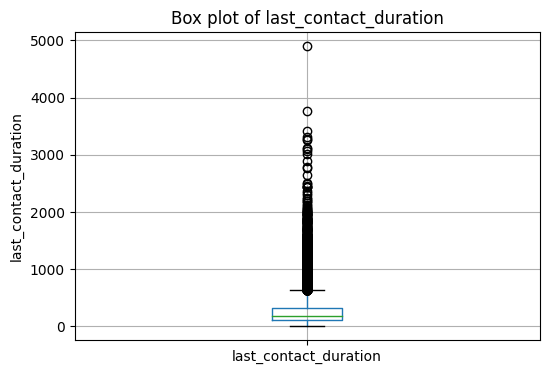

In [ ]:
detector.plot_box('last_contact_duration')

In [ ]:
detector.detect_outliers('last_contact_duration')

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
6,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,0,unknown,1
10,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,19,nov,1195.0,3.0,1,failure,0
38,30.0,self-employed,married,secondary,no,580.0,yes,no,cellular,13,oct,834.0,1.0,6,failure,0
53,30.0,management,single,tertiary,no,39.0,yes,no,cellular,15,may,900.0,3.0,2,other,1
79,26.0,technician,single,secondary,no,249.0,no,no,cellular,29,jan,716.0,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31576,33.0,technician,married,secondary,no,542.0,yes,no,cellular,16,apr,1575.0,1.0,4,failure,1
31583,47.0,blue-collar,divorced,primary,no,127.0,yes,no,unknown,3,jun,2450.0,2.0,0,unknown,1
31585,32.0,self-employed,married,secondary,no,5612.0,yes,no,cellular,28,jul,716.0,3.0,0,unknown,1
31638,28.0,entrepreneur,married,secondary,no,NaN,yes,no,unknown,27,may,1303.0,1.0,0,unknown,0


In [ ]:
detector.outlier_describe('last_contact_duration')

,with_outliers,without_outliers
count,31336.000000,29047.000000
mean,256.184038,201.062244
std,256.181479,138.775971
min,0.000000,0.000000
25%,103.000000,97.000000
50%,179.000000,167.000000
75%,315.250000,274.000000
max,4900.000000,633.000000


### 1.3.4 Conclusion

#### After analysing the Outliers present in the data come to the conclustion that these are **genuine outliers** and not typos or error in the data

## 1.4 Data Transformations - Part 1

### 1.4.1 Converting Months in short name to numeric format  

In [26]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Replace month short names with month numbers
data1['month'] = data1['month'].replace(month_map)

### 1.4.2 Label Encoding Binary catergorical columns

In [27]:
cat_columns = data1.select_dtypes(include=['object']).columns

binary_columns = [col for col in cat_columns if data1[col].nunique() == 2]

le = LabelEncoder()

data2 = data1.copy()

# Apply LabelEncoder to binary categorical columns
for col in binary_columns:
    data2[col] = le.fit_transform(data2[col])

In [28]:
data2.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,0,285.0,1,0,unknown,26,6,303.0,4.0,0,unknown,0
1,34.0,blue-collar,married,secondary,0,934.0,0,1,cellular,18,11,143.0,2.0,1,other,0
2,46.0,technician,married,secondary,0,656.0,0,0,cellular,5,2,101.0,4.0,0,unknown,0
3,34.0,services,single,secondary,0,2.0,1,0,unknown,20,5,127.0,3.0,0,unknown,0
4,41.0,blue-collar,married,primary,0,1352.0,1,0,cellular,13,5,49.0,2.0,0,unknown,0


In [29]:
data2['job_type'].unique()

array(['management', 'blue-collar', 'technician', 'services', 'retired',
       'entrepreneur', 'admin.', 'student', 'housemaid', 'self-employed',
       'unknown', 'unemployed'], dtype=object)

## 1.5 Exploratory Data Analysis

### 1.5.0 Correlation Heatmap

<Axes: >

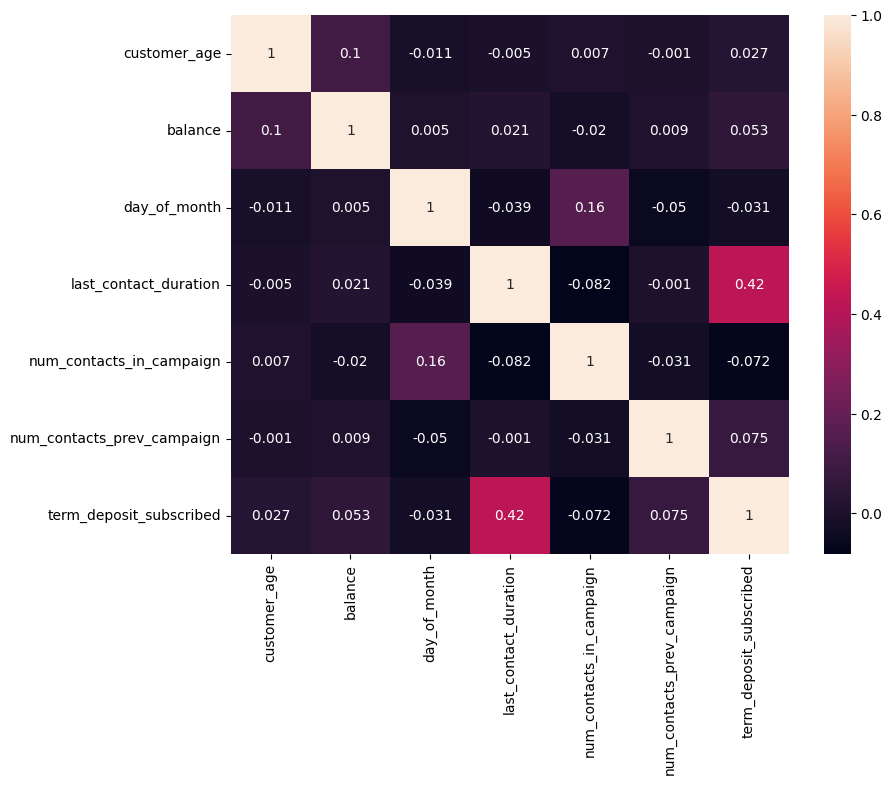

In [25]:
plt.figure(figsize=(9, 7))
df=round(data1.corr(numeric_only=True),3)
sns.heatmap(df, fmt='.2g', annot=True)

### 1.5.1 Customer Age

#### Distribution

Text(0.5, 0.98, 'Customer distribution by age')

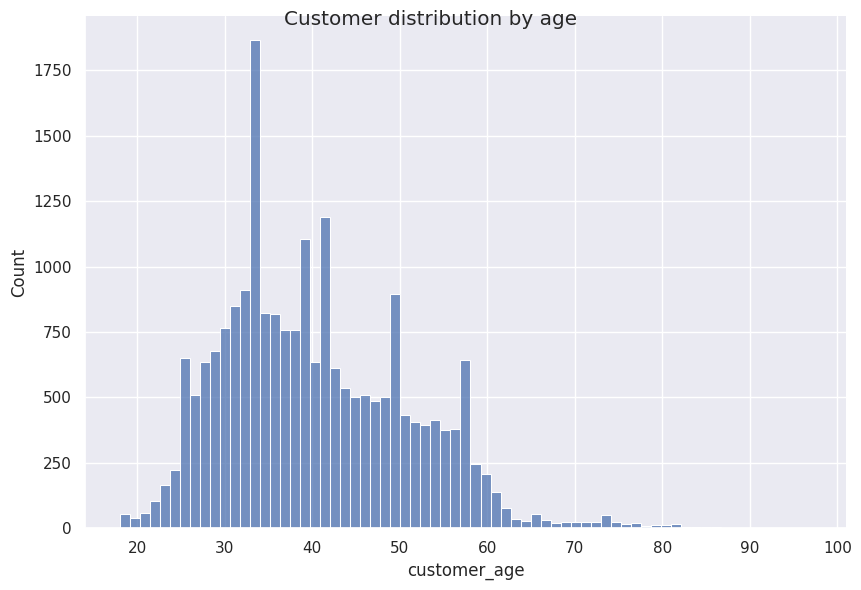

In [31]:
sns.set_theme(rc={'figure.figsize':(8,5)}) # Figsize can be edited if charts are too large
ax=sns.displot(data=data2,x="customer_age",height=6, aspect=11.7/8)
ax.figure.suptitle("Customer distribution by age")

#### Distribution by age group

Text(0.5, 0.98, 'Customer distribution by Age Group')

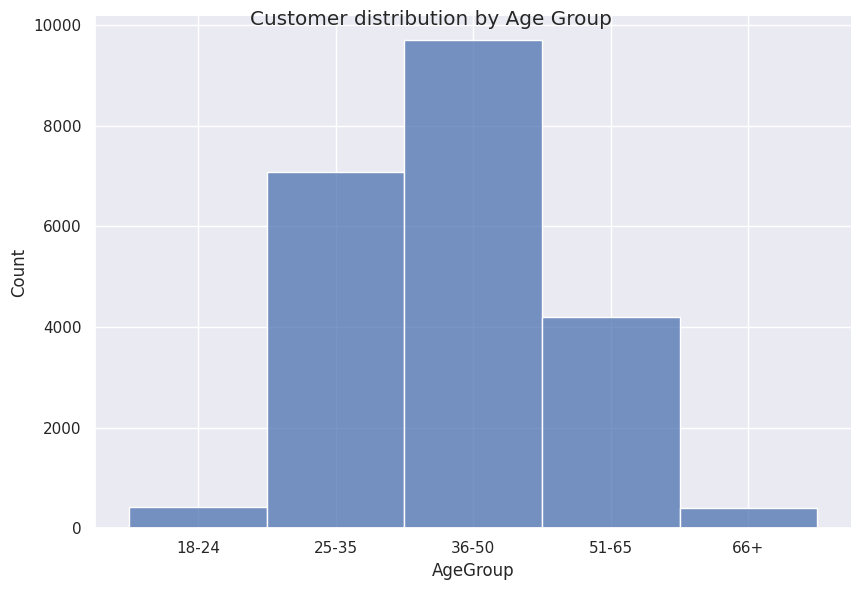

In [38]:
bins = [18, 24, 35, 50, 65, 100]
labels = ['18-24', '25-35', '36-50', '51-65', '66+']

data2['AgeGroup'] = pd.cut(data2['customer_age'], bins=bins, labels=labels, right=False)

ax1=sns.displot(data=data2,x="AgeGroup",height=6, aspect=11.7/8)
ax1.figure.suptitle("Customer distribution by Age Group")


**Customer distribution by Age Group**:

The Distribution plot provides a more in-depth analysis on customer distribution when plotted in age groups. The graph almost represents a normal distribution and the metrics are as follows.

* Highest proportion of customers are distributed in the age group of 36-50 with about 9500 Individuals.
* Lowest Customer distribution is in the ranges of ages 18-24 and 66+ with both comprising of around 300 customers in each group.

#### Customer balance in each Age Group

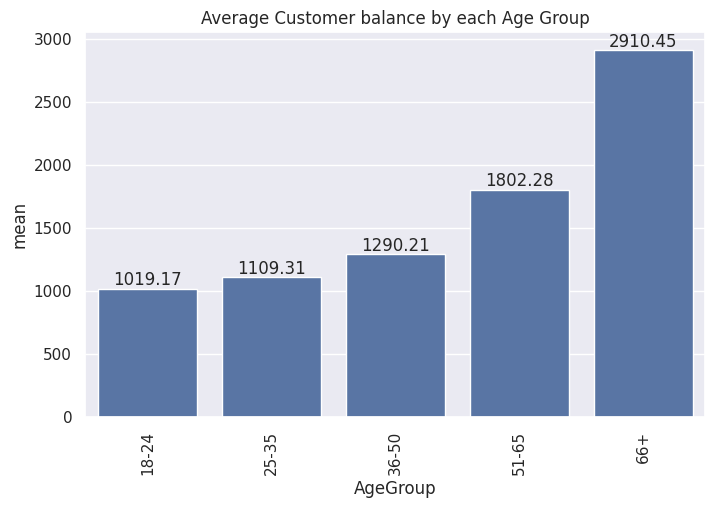

In [46]:
Bal_vs_age =data2.groupby('AgeGroup')['balance'].agg(['mean']).reset_index()

ax2=sns.barplot(data=Bal_vs_age,x='AgeGroup',y='mean')
ax2.tick_params(axis='x', rotation=90)
ax2.set_title("Average Customer balance by each Age Group")
ax2.bar_label(ax2.containers[0])
plt.show()

**Customer balance in each Age Group**:

The balance amount increases with the Age group, with 18-24 having the lowest average balance of 1019 and gropu 66+ is having the highest balance of 2910.

### 1.5.2 Default

#### Customer default by Age group

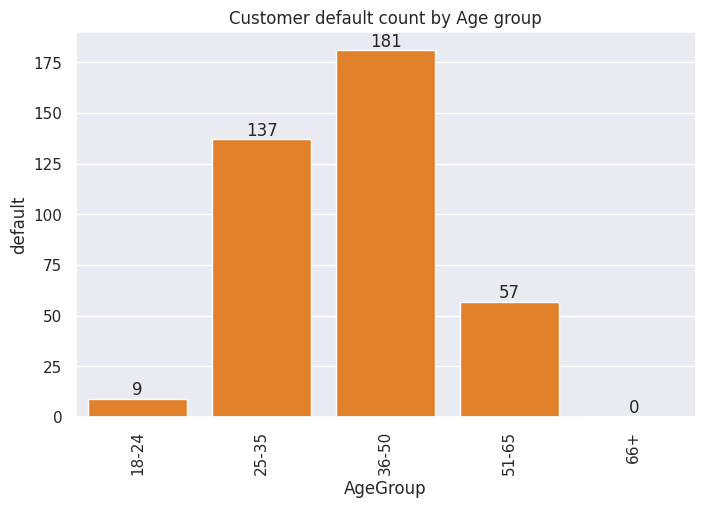

In [71]:
Def_vs_age =data2.groupby('AgeGroup')['default'].sum().reset_index()

ax3=sns.barplot(data=Def_vs_age,x='AgeGroup',y='default',color="#ff7f0e")
ax3.tick_params(axis='x', rotation=90)
ax3.set_title("Customer default count by Age group")
ax3.bar_label(ax3.containers[0])
plt.show()

#### Customer default proportion by Age group

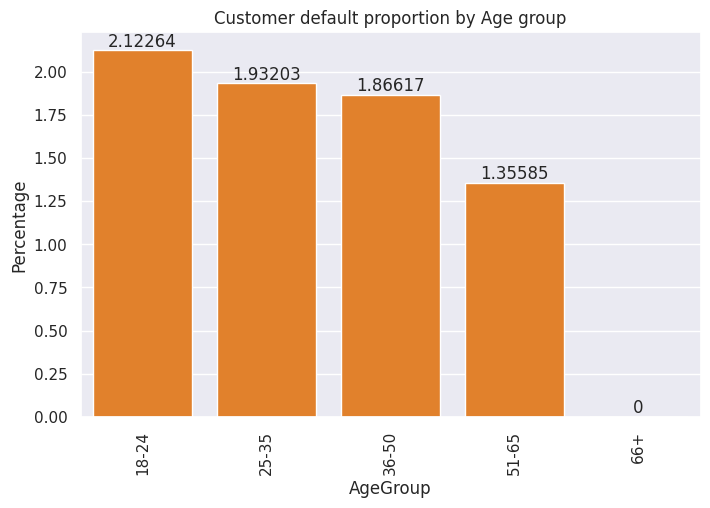

In [78]:
Def_vs_age =data2.groupby('AgeGroup')['default'].sum().reset_index()
Def=data2['AgeGroup'].value_counts().sort_index().reset_index()
Def_vs_age['Total'] = Def['count']
Def_vs_age['Percentage'] = (Def_vs_age['default'] / Def_vs_age['Total']) * 100

ax3=sns.barplot(data=Def_vs_age,x='AgeGroup',y='Percentage',color="#ff7f0e")
ax3.tick_params(axis='x', rotation=90)
ax3.set_title("Customer default proportion by Age group")
ax3.bar_label(ax3.containers[0])
plt.show()

**Conclusion**:
The proportion of default customers also follows as inverse trend with  **balance** as the highest proportion by total at each group defaulted is from age group 18-24.

#### Customer default proportion by Job Type

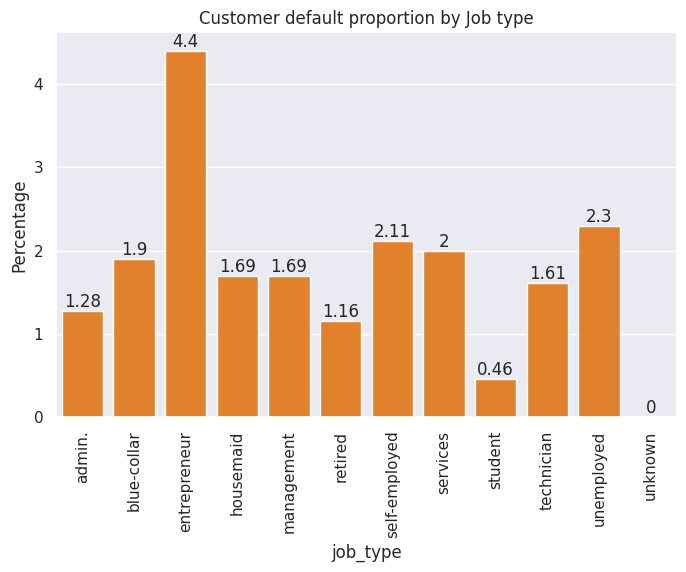

In [82]:
Def_vs_job =data2.groupby('job_type')['default'].sum().reset_index()
Def=data2['job_type'].value_counts().sort_index().reset_index()
Def_vs_job['Total'] = Def['count']
Def_vs_job['Percentage'] = round(((Def_vs_job['default'] / Def_vs_job['Total']) * 100),2)


ax4=sns.barplot(data=Def_vs_job,x='job_type',y='Percentage',color="#ff7f0e")
ax4.tick_params(axis='x', rotation=90)
ax4.set_title("Customer default proportion by Job type")
ax4.bar_label(ax4.containers[0])
plt.show()

**Conclusion**:
Entrepreneur customers have the highest chance of defaulting with 4.4%, followed by Unemployed customers at 2.3%.

#### Customer default proportion by Marital Status

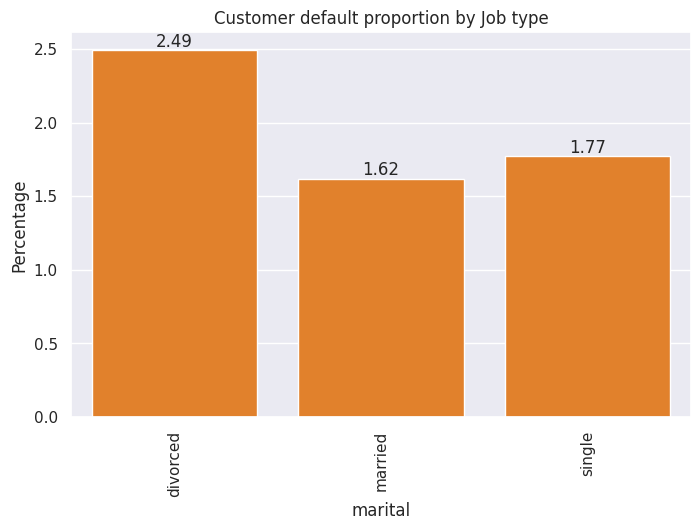

In [85]:
Def_vs_mar =data2.groupby('marital')['default'].sum().reset_index()
Def=data2['marital'].value_counts().sort_index().reset_index()
Def_vs_mar['Total'] = Def['count']
Def_vs_mar['Percentage'] = round(((Def_vs_mar['default'] / Def_vs_mar['Total']) * 100),2)


ax5=sns.barplot(data=Def_vs_mar,x='marital',y='Percentage',color="#ff7f0e")
ax5.tick_params(axis='x', rotation=90)
ax5.set_title("Customer default proportion by Job type")
ax5.bar_label(ax5.containers[0])
plt.show()

### 1.5.3 Balance

#### Customer Average Balance by Job Type

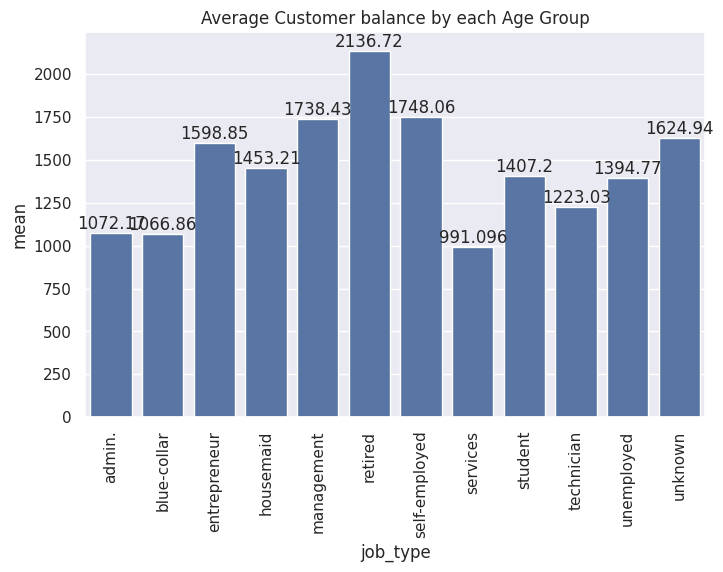

In [84]:
Bal_vs_job =data2.groupby('job_type')['balance'].agg(['mean']).reset_index()

ax5=sns.barplot(data=Bal_vs_job,x='job_type',y='mean')
ax5.tick_params(axis='x', rotation=90)
ax5.set_title("Average Customer balance by each Job type")
ax5.bar_label(ax5.containers[0])
plt.show()

#### Customer Average Balance by Marital status

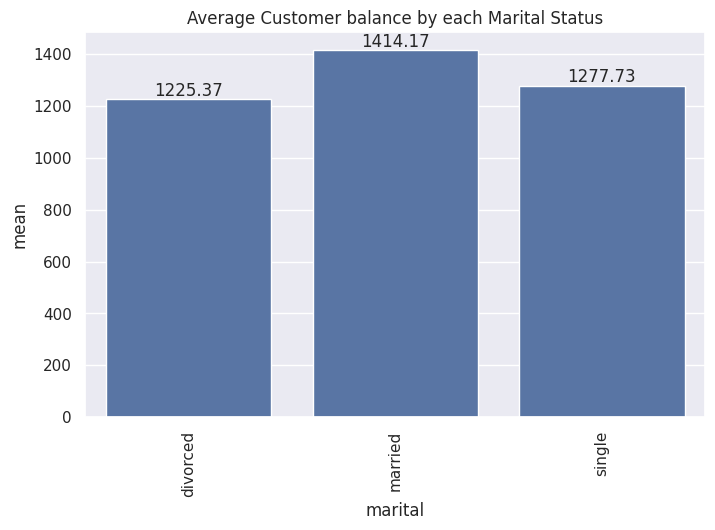

In [87]:
Bal_vs_mar =data2.groupby('marital')['balance'].agg(['mean']).reset_index()

ax6=sns.barplot(data=Bal_vs_mar,x='marital',y='mean')
ax6.tick_params(axis='x', rotation=90)
ax6.set_title("Average Customer balance by each Marital Status")
ax6.bar_label(ax6.containers[0])
plt.show()

### 1.5.4 Personal Loan

#### Customers with personal loan by Age group

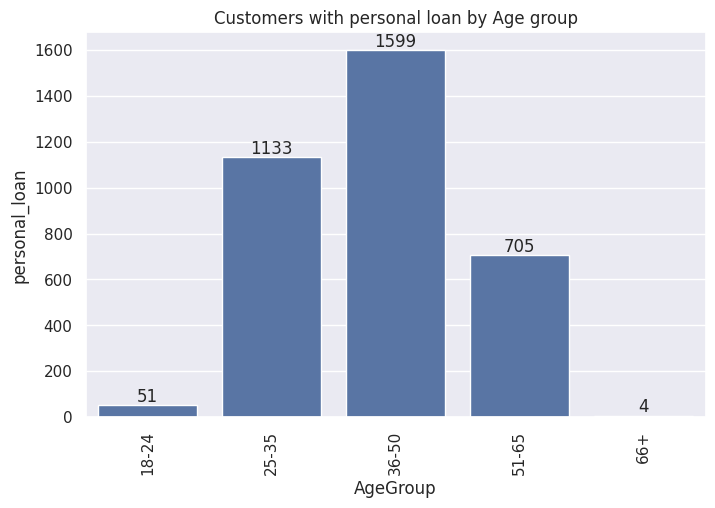

In [93]:
PL_vs_age =data2.groupby('AgeGroup')['personal_loan'].sum().reset_index()

ax7=sns.barplot(data=PL_vs_age,x='AgeGroup',y='personal_loan')
ax7.tick_params(axis='x', rotation=90)
ax7.set_title("Customers with personal loan by Age group")
ax7.bar_label(ax7.containers[0])
plt.show()

#### Customers with personal loan by proportion

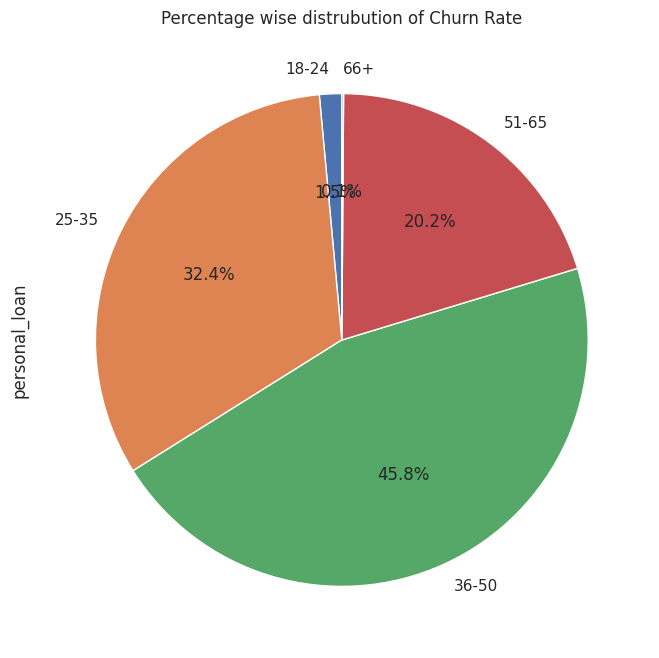

In [105]:
PL_vs_age =data2.groupby('AgeGroup')['personal_loan'].sum().reset_index()
PL_vs_age["personal_loan"].plot(kind='pie',figsize=(9,8),autopct="%1.1f%%", startangle=90, title='Percentage wise distrubution of Churn Rate',labels=PL_vs_age['AgeGroup'])
plt.show()

#### Customers with personal loan by Marital Status

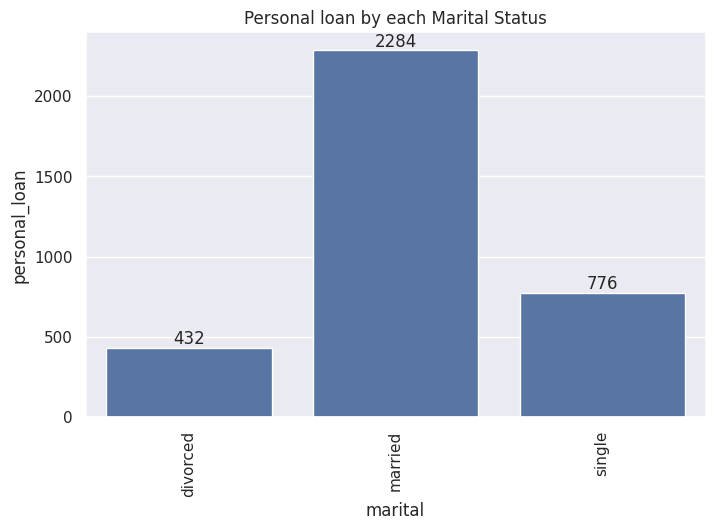

In [108]:
PL_vs_mar =data2.groupby('marital')['personal_loan'].sum().reset_index()
PL_vs_mar

ax8=sns.barplot(data=PL_vs_mar,x='marital',y='personal_loan')
ax8.tick_params(axis='x', rotation=90)
ax8.set_title("Personal loan by each Marital Status")
ax8.bar_label(ax8.containers[0])
plt.show()

#### Customers with personal loan by Job type

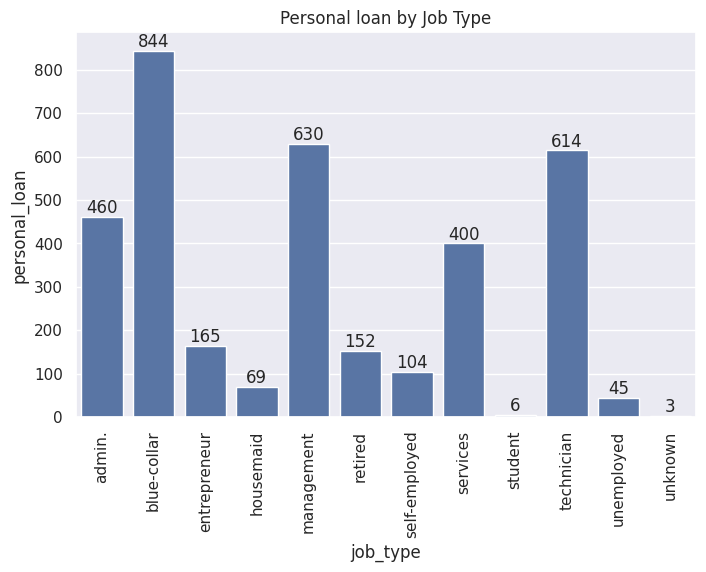

In [110]:
PL_vs_job =data2.groupby('job_type')['personal_loan'].sum().reset_index()

ax9=sns.barplot(data=PL_vs_job,x='job_type',y='personal_loan')
ax9.tick_params(axis='x', rotation=90)
ax9.set_title("Personal loan by Job Type")
ax9.bar_label(ax9.containers[0])
plt.show()